In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphs and plotting
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataanalytics-moreclean/DataAnalytics_clean.csv


In [133]:
df = pd.read_csv("../input/dataanalytics-moreclean/DataAnalytics_clean.csv") #Load the clean data
df.head() #Take a peek at the dataframe

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,low_estimate,high_estimate,State,Description Length,Has_Competitor
0,"Data Analyst, Center on Immigration and Justic...",37-66,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),None,True,37,66,NY,7057,False
1,Quality Data Analyst,37-66,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),None,False,37,66,NY,4702,False
2,"Senior Data Analyst, Insights & Analytics Team...",37-66,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66,NY,4688,True
3,Data Analyst,37-66,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),None,False,37,66,NY,5249,False
4,Reporting Data Analyst,37-66,ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,NY,3376,True


---

# Salary Estimates by State

Sources for later use to me: https://stackoverflow.com/questions/41119623/pandas-pivot-table-sort-values-by-columns, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

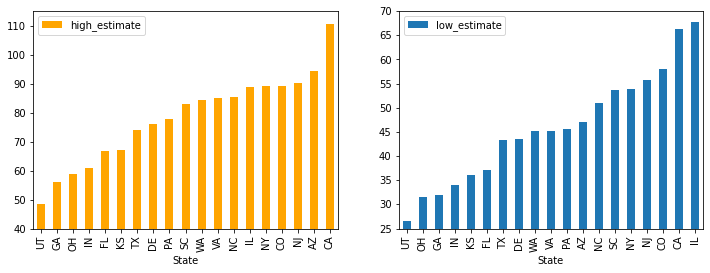

In [134]:
#These each give a pivot table comparing price estimates by state. However, High is sorted by the high estimates and Low is sorted by the low estimate
High = pd.pivot_table(df, values = ["high_estimate"], index = ["State"], aggfunc = np.mean).sort_values(by = "high_estimate")
Low = pd.pivot_table(df, values = ["low_estimate"], index = ["State"], aggfunc = np.mean).sort_values(by = "low_estimate")
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) # A Window for the plot to everything can actually be readable
High.plot.bar(ax = axes[0], color="orange", ylim = (40,115)) #Plotting the histogram for the high estimate
Low.plot.bar(ax = axes[1], ylim = (25,70)) #Plotting the histogram for the low estimate

In the two pivot tables, there is a trend of higher cost-of-living states having higher estimated salaries in both the low and high estimations. An interesting exception is Arizona, which is not on the same league as a place like New Jersey but has a similar high estimated salary. This means there may be a potential upward skew in the high end of the expected range, likely caused by more senior positions and/or less overall entries.

---

# Competitors play on the salary

In [135]:
#A pivot table to check the salary estimates of companies that have key competitors or not
High = pd.pivot_table(df, values = ["low_estimate","high_estimate"], index = ["Has_Competitor"], aggfunc = np.mean).sort_values(by = "high_estimate",ascending = False)
print(High) #Print the two pivot tables with some spacing between

                high_estimate  low_estimate
Has_Competitor                             
True                90.671785     54.677543
False               89.770653     54.143270


Having a competitor does not seem to have much bearing on the salary estimate, contrary to my initial assumption. There is a bit of a jump, but the lack of a significant jump tells me competition is not driving salaries higher to a significant extent.

---

# Industry's Effect on Salary (Based on High Estimate)

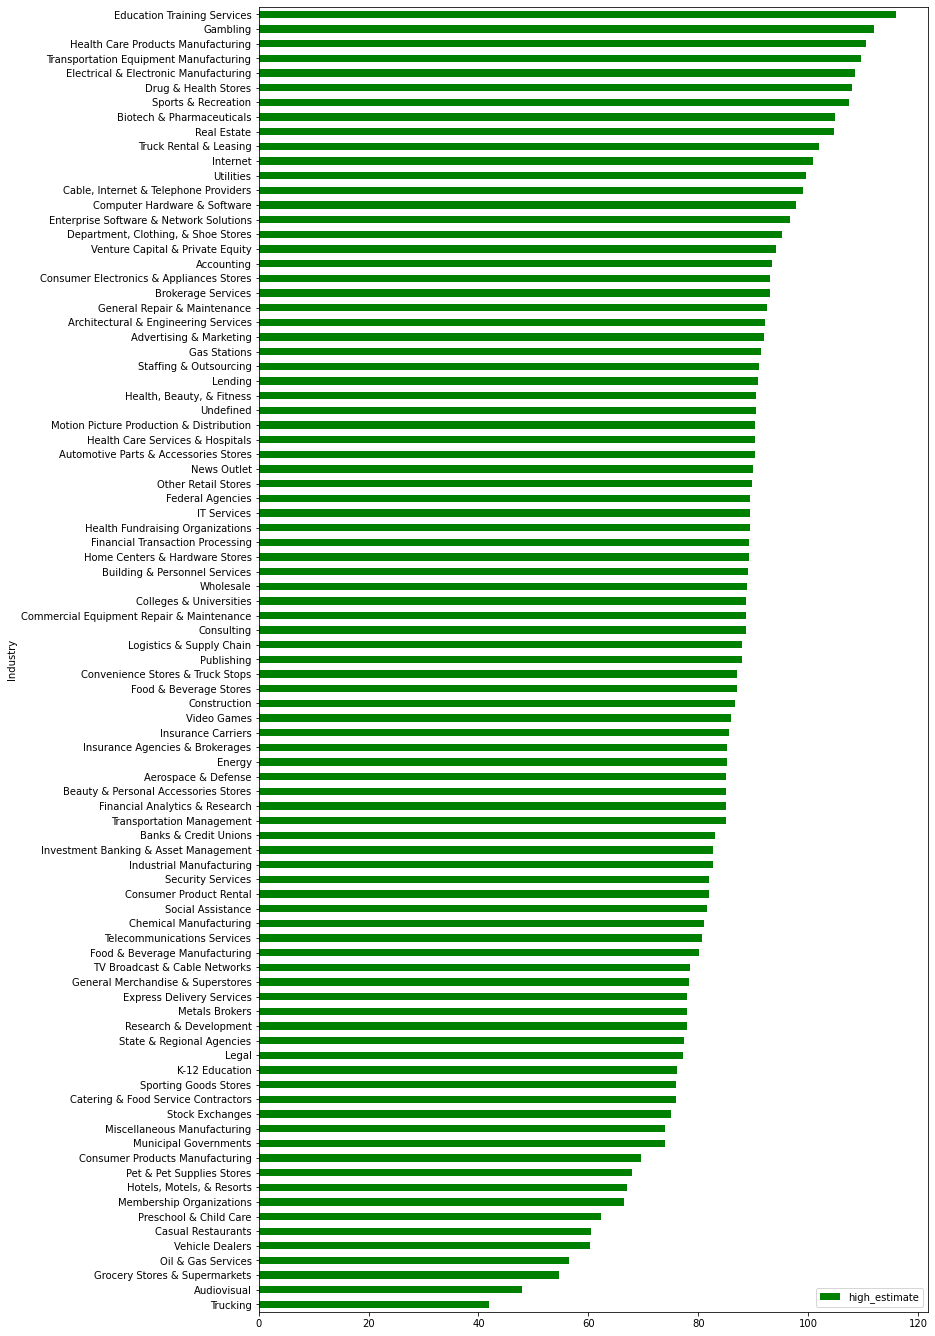

In [136]:
#This data was pulled into a pivot table to segment it out for ease of creating the plot. 
Industry = pd.pivot_table(df, values = "high_estimate", index = ["Industry"], aggfunc = np.mean).sort_values(by = "high_estimate")
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,24)) # A Window for the plot to everything can actually be readable
Industry.plot.barh(ax = axes, color = "green") #Plotting the histogram, horizontal for increased readability

This chart shows which industries will have a higher estimated salary according to this data. This puts services like Gambling and Education Training putting more value into their employees, potentially hiring more senior staff. On the other hand, industries like Trucking, Audiovisual, and Grocery Stores pay much less, likely hiring less experienced staff or putting less value on the data analytics field.

---

# Company Revenue vs Salary Estimate

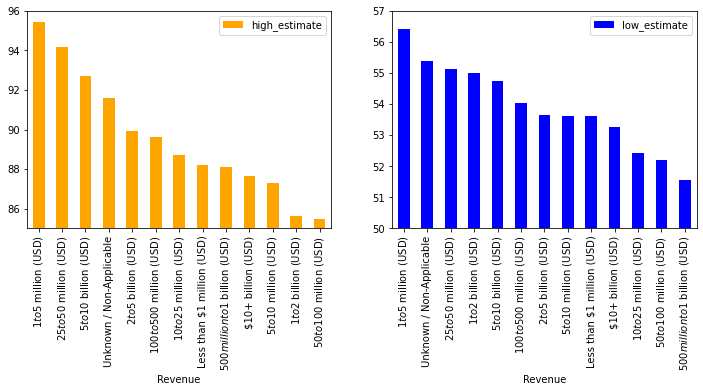

In [137]:
#Pivot tables for high and low estimates, relating each to company revenue
High = pd.pivot_table(df, values = ["high_estimate"], index = ["Revenue"], aggfunc = np.mean).sort_values(by = "high_estimate", ascending = False)
Low = pd.pivot_table(df, values = ["low_estimate"], index = ["Revenue"], aggfunc = np.mean).sort_values(by = "low_estimate", ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) # A Window for the plot to everything can actually be readable
High.plot.bar(ax = axes[0], color = "orange",ylim = (85,96)) #Plotting the high estimate histogram
Low.plot.bar(ax = axes[1], color = "Blue", ylim = (50,57)) #Plotting the low estimate histogram

This shows the companies by revenue for both the low estimate and the high estimate. They have scaled to their proper values in order to show the difference between each revenue branch proportionally. Ignoring the comapnies that did not give their revenue bracket, the highest paying in both sections appear to be those on both the immediate higher end of the scale and those on the immediate lower end of the scale. In both cases, the 1-5 million and the 5-10 billion companies are relatively high on the list while middle tier companies round out the bottom. The true exception being the ultra big companies (10+ billion in revenue), but I would consider those big amazon-esque companies to be in their own ball park entirely.


---

# Company Size vs Expected Salary

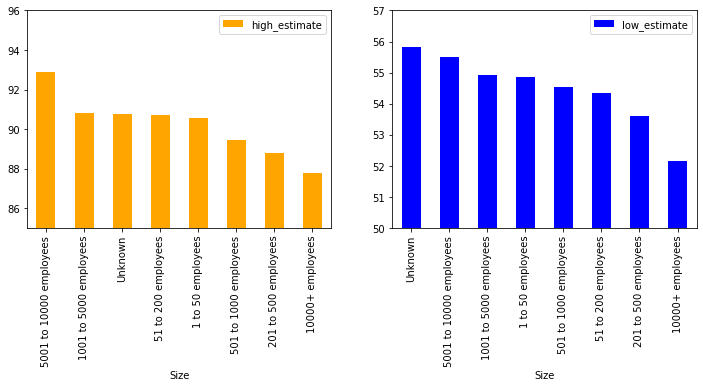

In [138]:
#Pivot tables for high and low estimates, relating each to company size
High = pd.pivot_table(df, values = ["high_estimate"], index = ["Size"], aggfunc = np.mean).sort_values(by = "high_estimate", ascending = False)
Low = pd.pivot_table(df, values = ["low_estimate"], index = ["Size"], aggfunc = np.mean).sort_values(by = "low_estimate", ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) # A Window for the plot to everything can actually be readable
High.plot.bar(ax = axes[0], color = "orange",ylim = (85,96)) #Plotting the high estimate histogram
Low.plot.bar(ax = axes[1], color = "Blue", ylim = (50,57)) #Plotting the low estimate histogram

Interestingly, plotting the company size has similar results to plotting revenue, showing that those tend to go hand in hand. Once again, ignoring unknowns, the biggest companies were in their own ball park while the remaining biggest and smallest payed their employees most. 

---

# Which companies were wordier?

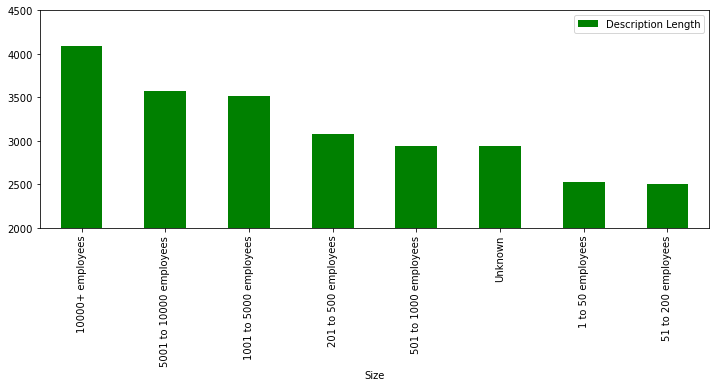

In [139]:
#A pivot table to check which companies were wordier
Verbose = pd.pivot_table(df, values = ["Description Length"], index = ["Size"], aggfunc = np.mean).sort_values(by = "Description Length",ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4)) # A Window for the plot to everything can actually be readable
Verbose.plot.bar(ax = axes, color = "green", ylim = (2000,4500)) #Plotting verbosity histogram

It turns out that the bigger you are, the wordier your descriptions are. This could be more legal wording causing it or trying to be more thorough, but either way, it causes a clear trend.

---

# Does Rating effect Company Size?

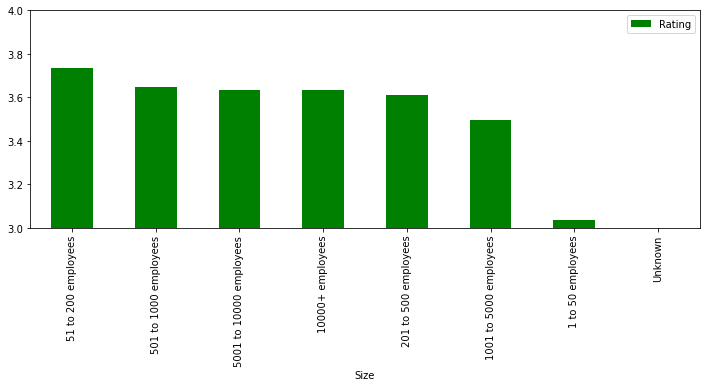

In [140]:
#A pivot table to compare rating to company size
Rating = pd.pivot_table(df, values = ["Rating"], index = ["Size"], aggfunc = np.mean).sort_values(by = "Rating",ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4)) # A Window for the plot to everything can actually be readable
Rating.plot.bar(ax = axes, color = "green", ylim = (3,4)) #Plotting the rating histogram

In general, the ratings indicate little variance, indicating the size does not indicate how it would be rating. The notible exception is the smallest companies (1 to 50 employees),which says that startups specifically are having a harder time in the busniess sector, which is to be expected.